# Image discrimination task

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
import os
import random

## Load and split image dataset

In [2]:
batch_size = 32
img_size = (128, 128)
data_dir = "data/images"

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Class names:", class_names)



Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 8000 files belonging to 2 classes.
Using 1600 files for validation.
Class names: ['bouba', 'kiki']


## Setup CNN model

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5), # to avoid overfitting
    layers.Dense(1, activation="sigmoid") # for binary classification
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

/Users/sidneyma/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training

In [4]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 31s 154ms/step - accuracy: 0.8788 - loss: 34.6984 - val_accuracy: 0.9919 - val_loss: 0.0207
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 31s 157ms/step - accuracy: 0.9950 - loss: 0.0255 - val_accuracy: 0.9919 - val_loss: 0.0226
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 31s 157ms/step - accuracy: 0.9949 - loss: 0.0151 - val_accuracy: 0.9919 - val_loss: 0.0248
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 158ms/step - accuracy: 0.9977 - loss: 0.0080 - val_accuracy: 0.9969 - val_loss: 0.0082
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 158ms/step - accuracy: 0.9966 - loss: 0.0097 - val_accuracy: 0.9987 - val_loss: 0.0064
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.9985 - loss: 0.0052 - val_accuracy: 0.9969 - val_loss: 0.0102
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.9982 - loss: 0.0073 - val_accuracy: 0.9962 - val_loss: 0.0113
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 161ms/step - accuracy: 0.9977 - loss: 

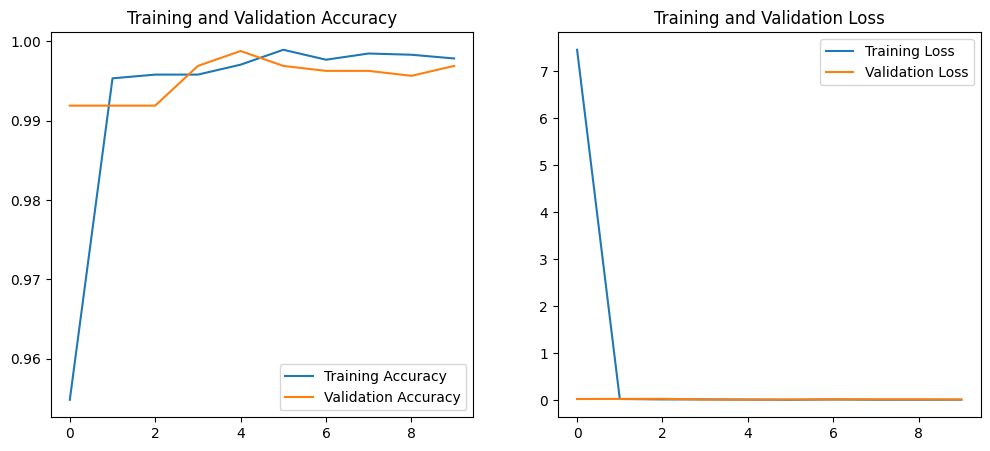

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## Demonstration

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


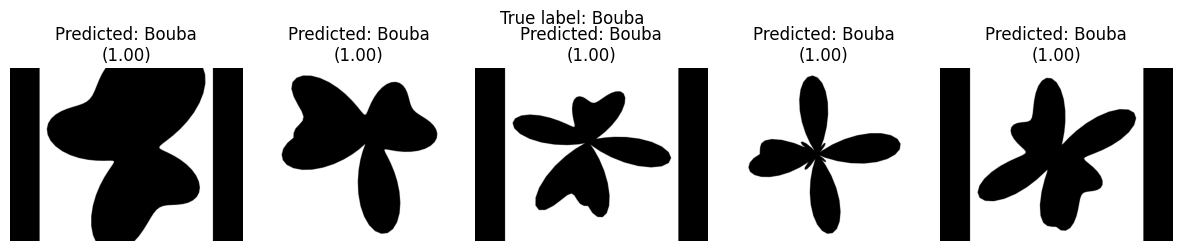

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


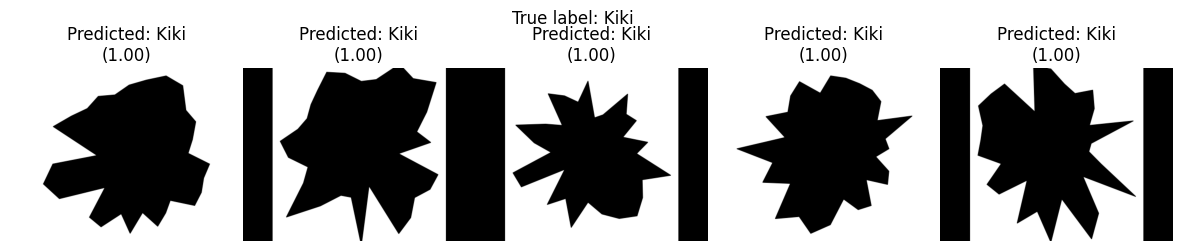

In [17]:
def load_and_preprocess_image(img_path):
    img_display = tf.keras.preprocessing.image.load_img(img_path)
    
    img_pred = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img_pred)
    img_array = np.expand_dims(img_array, axis=0)  # add batch axis
    return img_display, img_array

def plot_predictions(samples, true_label):
    plt.figure(figsize=(15, 3))
    for i, img_path in enumerate(samples):
        img_display, img_array = load_and_preprocess_image(img_path)
        prediction = model.predict(img_array)[0][0]
        predicted_label = "Predicted: Bouba" if prediction < 0.5 else "Predicted: Kiki"
        confidence = (1 - prediction) if prediction < 0.5 else prediction
        
        plt.subplot(1, len(samples), i + 1)
        plt.imshow(img_display)
        plt.title(f"{predicted_label}\n({confidence:.2f})")
        plt.axis('off')
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(f"True label: {true_label}")
    plt.show()

plot_predictions(bouba_samples, "Bouba")
plot_predictions(kiki_samples, "Kiki")


In [8]:
# Saving model
model.save("models/image_cnn.h5")

Model saved as 'image_cnn.h5'
